# Executive summary

- There is positive correlation between serum_creatinine and death event & age and death event
- There is strong negative correlation between time and death event
- There is negative correlation between serum_sodium and death event & ejection_fraction

- The distribution of each binary features is not 1 to 1 which means the dataset is biased.
    - The number of surviving patients is greater than deceased patients
- The DEATH_EVENT, a target variable, is not evenly distributed which means we have a imbalanced dataset. We have take this into consider when splitting our data and training the model.

- The median age is around 60 which is less the mean age of 60.829431. The age distribution is slighty skewed to the right.
- The majority of the patients age is around 50 to 70.
- The deceased patients' serum creatinine level are often higher than 1.5
- The deceased patients ejection fraction level are mostly lower than surviving patients
- The serum sodium level is very wide for deceased patients while narrow for surviving patients.
- The deceased patients tend to have less follow up time compared to surviving patients follow up time

### Feature Selection: Age, Serum_creatinine, Ejection_fraction, Time, Serum_sodium 

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv("cleaned.csv")
df.sample(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
30,94,0,582,1,38,1,263358.03,1.83,134,1,0,27,1
111,55,0,60,0,35,0,228000.00,1.20,135,1,1,90,0
204,78,1,64,0,40,0,277000.00,0.70,137,1,1,187,0
98,60,1,156,1,25,1,318000.00,1.20,137,0,0,85,0
83,79,1,55,0,50,1,172000.00,1.80,133,1,0,78,0


In [6]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.829431,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894997,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Text(0.5, 1.0, 'Correlation Heatmap')

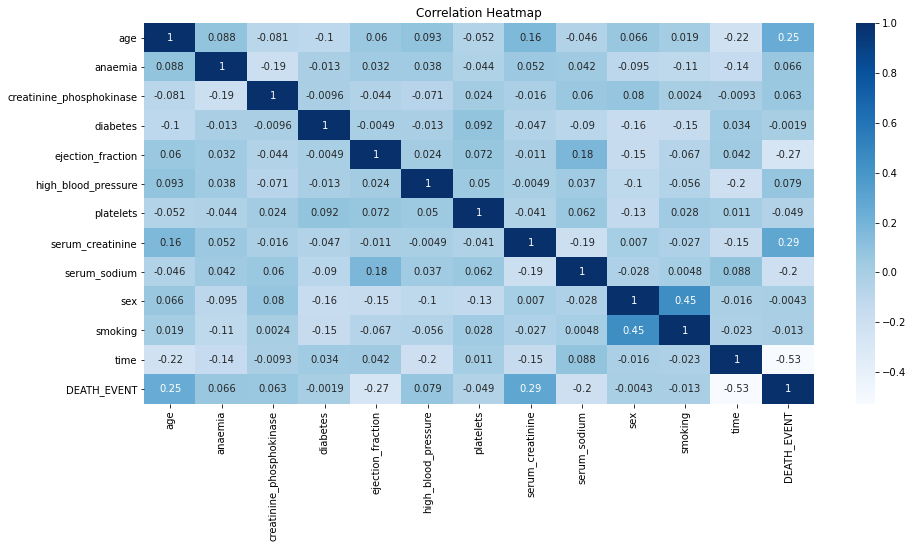

In [96]:
plt.figure(figsize=(15, 7))
heatmap=sns.heatmap(df.corr(),annot=True,cmap="Blues")
heatmap.set_title('Correlation Heatmap')

- There is positive correlation between serum_creatinine and death event & age and death event
- There is negative correlation between serum_sodium and death event & ejection_fraction
- There is strong negative correlation between time and death event
- There is positive correlation between sex and smokinng

In [172]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

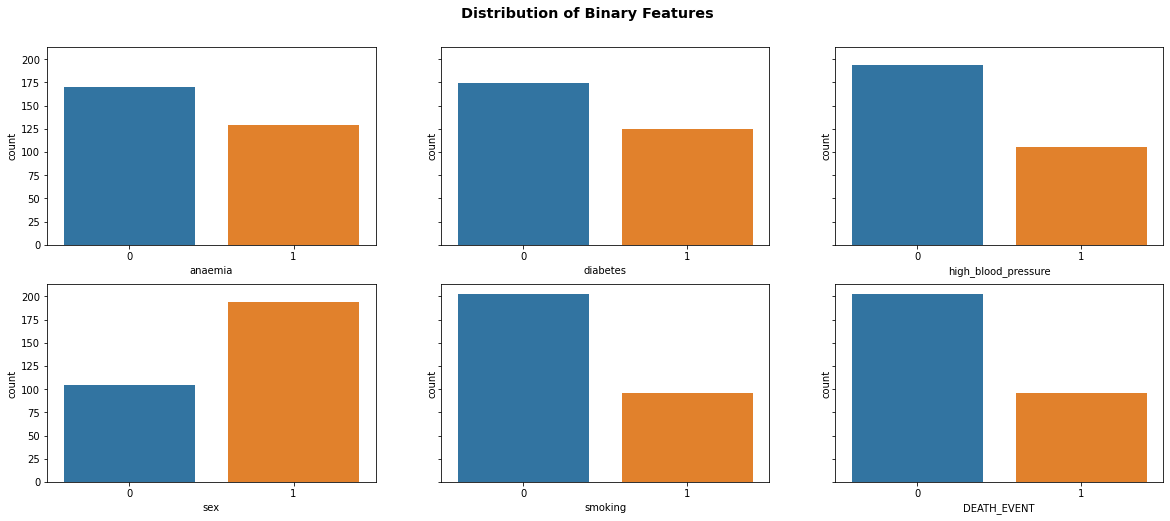

In [187]:
fig, axes= plt.subplots(2,3,figsize=(20, 8),sharey=True)

sns.countplot(ax=axes[0,0],x='anaemia',data=df)
sns.countplot(ax=axes[0,1],x='diabetes',data=df)
sns.countplot(ax=axes[0,2],x='high_blood_pressure',data=df)
sns.countplot(ax=axes[1,0],x='sex',data=df)
sns.countplot(ax=axes[1,1],x='smoking',data=df)
sns.countplot(ax=axes[1,2],x='DEATH_EVENT',data=df)

plt.suptitle("Distribution of Binary Features",y=.95, size='x-large',weight='bold')
plt.show()

- The distribution of each binary features is not 1 to 1 which means the dataset is biased.
    - The number of male patients is greater than female patients
    - The number of non smokers is greater than  smokers
    - The number of patients who do not have anaemia,diabetes, and high blood pressure is greater than those who have these conditions
     - The number of surviving patients is greater than deceased patients
- The DEATH_EVENT, a target variable, is not evenly distributed which means we have a imbalanced dataset. We have take this into consider when splitting our data and training the model.

## Demographic Features: Age and Sex in regards to Death Event

Text(0.5, 1.0, 'Age distribution')

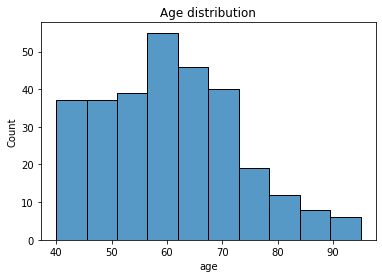

In [197]:
age_hist=sns.histplot(data=df,x="age",palette="Blues")
age_hist.set_title("Age distribution")

Text(0.5, 1.0, 'Age distribution')

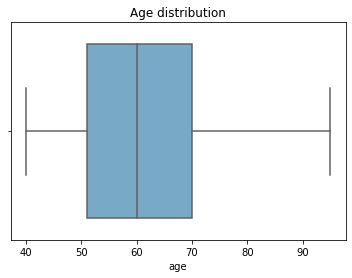

In [200]:
age_box=sns.boxplot(data=df,x="age",palette="Blues")
age_box.set_title("Age distribution")

- The median age is around 60 which is less the mean age of 60.829431. The age distribution is slighty skewed to the right
-  The majority of the patients age is around 50 to 70.

Text(0.5, 1.1, 'Age Distribution by Gender')

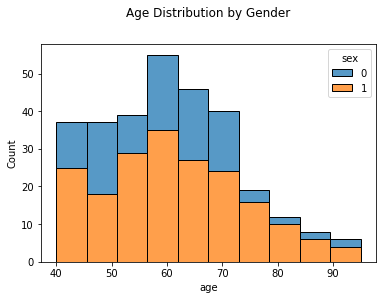

In [213]:
age_sex=sns.histplot(data=df, x="age", hue="sex",multiple="stack")
age_sex.set_title("Age Distribution by Gender",y=1.10)

In [194]:
male=df[df["sex"]==1]
female=df[df["sex"]==0]

Text(0.5, 0.95, 'Age Distribution by Gender')

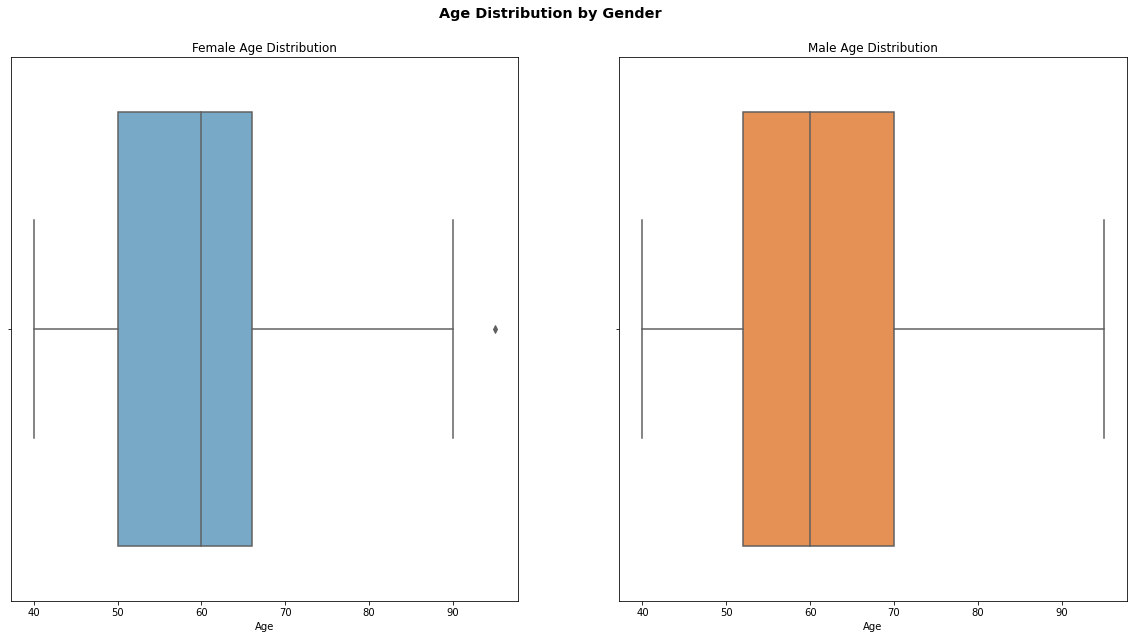

In [207]:
fig, axes = plt.subplots(1, 2, sharey=True,figsize=(20,10),)
sns.boxplot(ax=axes[0], data=female, x='age',palette="Blues")
sns.boxplot(ax=axes[1], data=male, x='age',palette="Oranges")
axes[0].set_xlabel('Age')
axes[1].set_xlabel('Age')
axes[0].set_title('Female Age Distribution')
axes[1].set_title('Male Age Distribution')
plt.suptitle("Age Distribution by Gender",y=.95, size='x-large',weight='bold')

- There is a outlier in the male age distribution.
- The male age distribution is right skewed while female age distribution is left skewed.
- The median age for both genders are approximately close to total median age.

Text(0.5, 1.1, 'Age Distribution of Death Event by Gender')

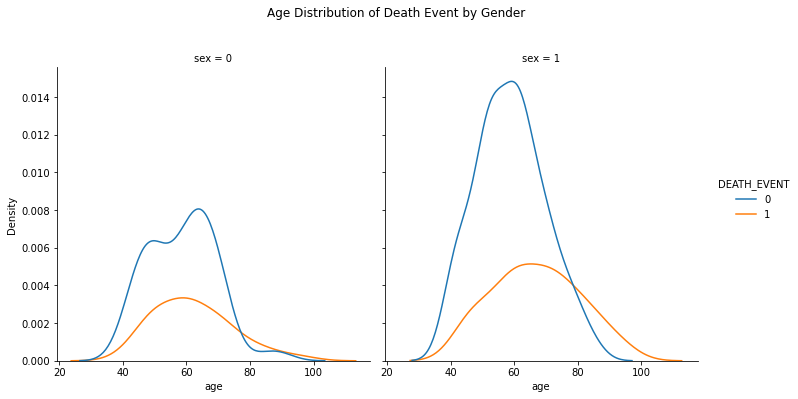

In [125]:
age_death_sex=sns.displot(data=df, x="age", hue="DEATH_EVENT", col="sex",kind="kde")
age_death_sex.fig.suptitle("Age Distribution of Death Event by Gender",y=1.10)

In [228]:
df.groupby(["DEATH_EVENT","sex"])["age"].describe()

count       mean        std   min    25%   50%   75%   max
DEATH_EVENT sex                                                            
0           0     71.0  58.619718  10.579449  40.0  50.00  60.0  65.0  90.0
            1    132.0  58.833333  10.707896  40.0  50.75  60.0  65.0  85.0
1           0     34.0  62.176471  12.327527  42.0  50.75  60.0  70.0  95.0
            1     62.0  66.870968  13.487680  45.0  58.25  66.5  75.0  95.0

- The age distribution of deceased patients is pretty wide.
- The age distribution of deceased patients is unimodal with a peak at around 58 for female patients and a peak at around 68 for male
- For surviving female patients,the distribtion is  bimodal with peaks at around 65 and 50. 
- For surviving male patient, the distribution is narrow.

# Serum_creatinine

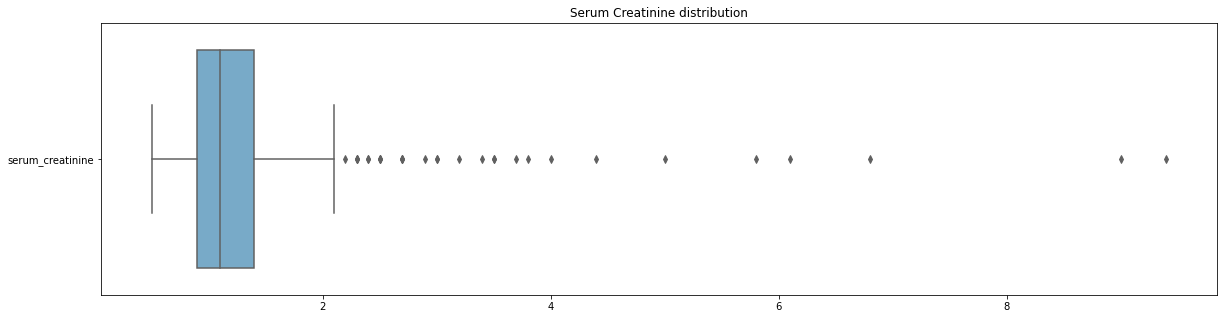

In [150]:
fig, ax = plt.subplots(figsize=(20, 5))
ax=sns.boxplot(data=df[["serum_creatinine"]],palette="Blues",orient='h')
plt.title("Serum Creatinine distribution")
plt.show()

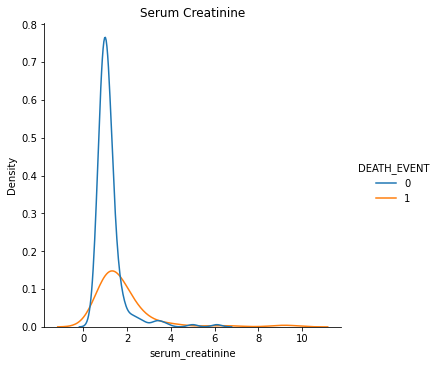

In [225]:
sns.displot(data=df, x="serum_creatinine", hue="DEATH_EVENT",kind="kde")
plt.title("Serum Creatinine")
plt.show()

In [226]:
df.groupby("DEATH_EVENT")["serum_creatinine"].describe()

,count,mean,std,min,25%,50%,75%,max
DEATH_EVENT,,,,,,,,
0,203.0,1.184877,0.654083,0.5,0.900,1.0,1.2,6.1
1,96.0,1.835833,1.468562,0.6,1.075,1.3,1.9,9.4


- The deceased patients serum creatinine level are ofter higher than 1.5

## ejection_fraction

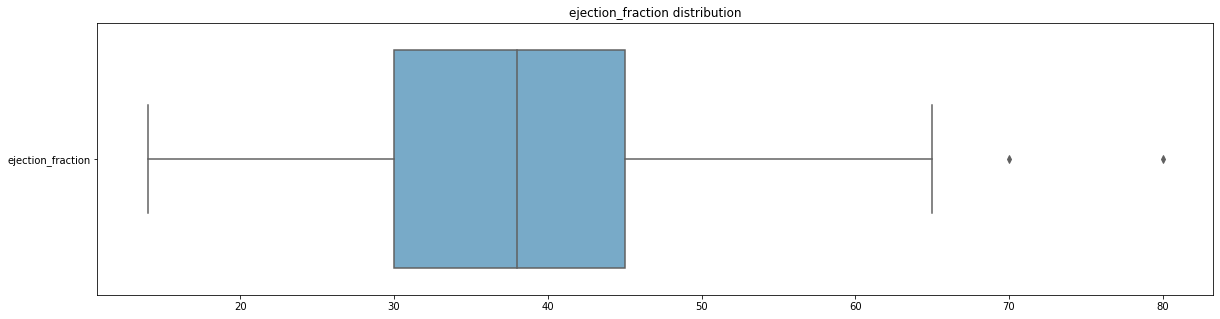

In [229]:
fig, ax = plt.subplots(figsize=(20, 5))
ax=sns.boxplot(data=df[["ejection_fraction"]],palette="Blues",orient='h')
plt.title("ejection_fraction distribution")
plt.show()

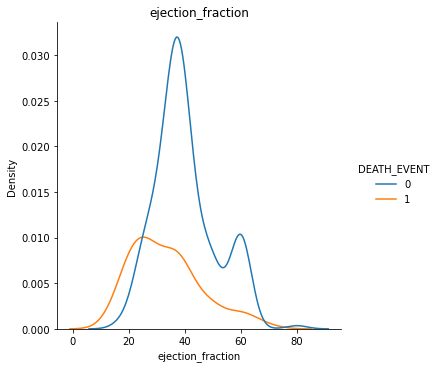

In [230]:
sns.displot(data=df, x="ejection_fraction", hue="DEATH_EVENT",kind="kde")
plt.title("ejection_fraction")
plt.show()

In [231]:
df.groupby("DEATH_EVENT")["ejection_fraction"].describe()

,count,mean,std,min,25%,50%,75%,max
DEATH_EVENT,,,,,,,,
0,203.0,40.26601,10.859963,17.0,35.0,38.0,45.0,80.0
1,96.0,33.46875,12.525303,14.0,25.0,30.0,38.0,70.0


- Majority of surviving patient have ejection_fraction level are mostly at 40 and 60
- Majority of deceased patients have ejection_fraction level at 25

## Serum_sodium

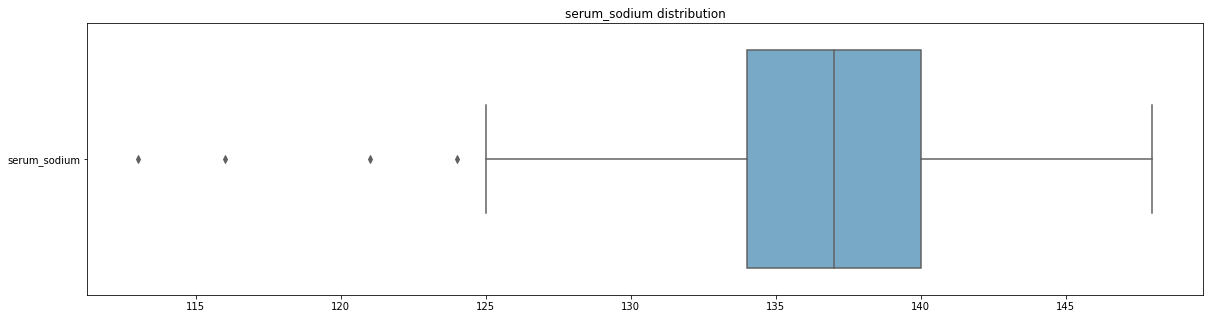

In [232]:
fig, ax = plt.subplots(figsize=(20, 5))
ax=sns.boxplot(data=df[["serum_sodium"]],palette="Blues",orient='h')
plt.title("serum_sodium distribution")
plt.show()

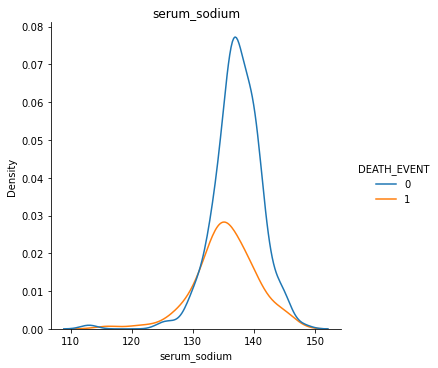

In [235]:
sns.displot(data=df, x="serum_sodium", hue="DEATH_EVENT",kind="kde")
plt.title("serum_sodium")
plt.show()

In [233]:
df.groupby("DEATH_EVENT")["serum_sodium"].describe()

,count,mean,std,min,25%,50%,75%,max
DEATH_EVENT,,,,,,,,
0,203.0,137.216749,3.982923,113.0,135.5,137.0,140.00,148.0
1,96.0,135.375000,5.001579,116.0,133.0,135.5,138.25,146.0


- The serum sodium level is very wide for deceased patients while narrow for surviving patients.

# time

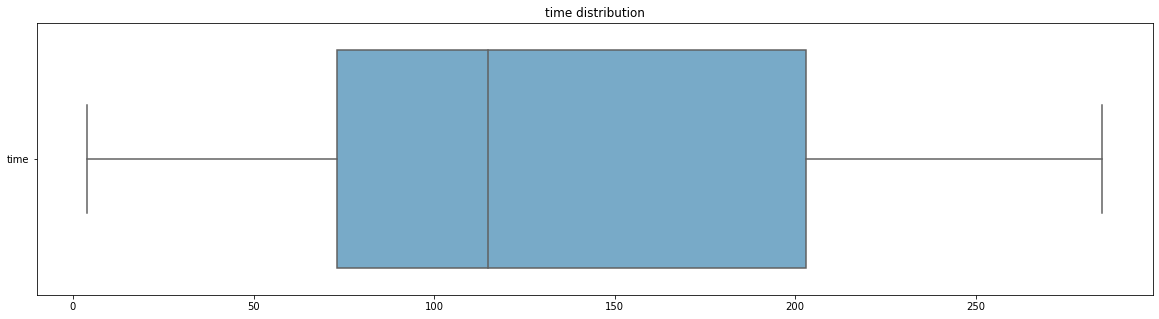

In [237]:
fig, ax = plt.subplots(figsize=(20, 5))
ax=sns.boxplot(data=df[["time"]],palette="Blues",orient='h')
plt.title("time distribution")
plt.show()

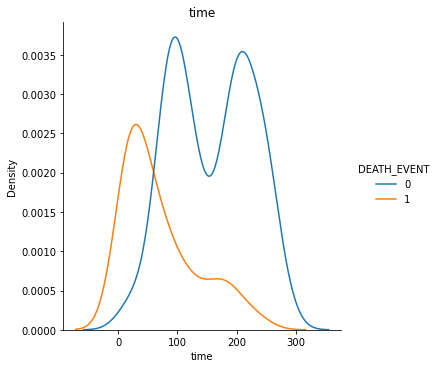

In [238]:
sns.displot(data=df, x="time", hue="DEATH_EVENT",kind="kde")
plt.title("time")
plt.show()

- The deceased patients tend to have less follow up time compared to surviving patients follow up time